# Repeated Measurements
As alluded to in the introduction, experiments where multiple measurements are taken from the same subject are problematic from an analysis perspective. These are known as *repeated measurement*, *repeated measures* or *within-subject* designs. In this first part, we will explore *why* these designs cause problems, before spending the rest of the lesson discussing some traditional remedies. This is all ground work to allow us to begin on the core topic of *linear mixed-effects models* next week. 

## Repeated Measures Designs
Up until now the only experimental designs we have considered are those where a *single* measurement is taken from each subject[^subject-foot]. This means that every row of our data sets and every value of $y$ was considered a *separate* subject. Thinking back to the idea of factorial experiments, this means that *different* experimental conditions represent different groups of individuals. No single individual was present in *both* groups and thus different subjects were randomised to different experimental conditions. These are known as *independent measures* or *between-subjects* designs. For example, the illustration in  {numref}`between-sub-fig`. shows a between-subjects design where half the sample undergo a happy mood induction and the other half undergo a sad mood induction.

```{figure} ./images/between-subjects-design.png
---
width: 600px
name: between-sub-fig
---
An example of a between-subjects design for a happy and sad mood induction experiment.
```

A different form of design comes from an experiment where each subject participates in *every* experimental condition. For instance, each subject performs a task that has 3 different difficulty conditions (*easy*, *medium*, *hard*). If each subject performs each of these conditions then we have 3 measurements per-subject and this is known as a *repeated measures* or *within-subject* design[^long-foot]. In this example, there is nothing fundamental about the experiment that forces it to be repeated measurements. A between-subjects variant could easily be conducted where each subject participates in only *one* of the experimental conditions. As such, for this particular example, repeated measurements are a *choice* rather than a fundamental reality of the data. This experimental setup is illustrated in {numref}`within-sub-fig`.

```{figure} ./images/within-subject-design.png
---
width: 500px
name: within-sub-fig
---
An example of a within-subject design for 3 different difficulty conditions of an experiment.
```

Finally, both *between-subjects* and *within-subject* designs can be combined. As an example, we could continue our example of task difficulty, where every subject participates in every condition. However, now let us say that half those subjects receive a *sad* mood induction and half receive a *happy* mood induction. We now have *two* experimental manipulations, one of which is conducted *within-subject* (difficulty condition) and one of which is conducted *between-subjects* (mood induction). This is illustrated in {numref}`mixed-measures-fig`.

```{figure} ./images/mixed-measures-design.png
---
width: 500px
name: mixed-measures-fig
---
An example of a design with both a within-subject and between-subjects experimental manipulation.
```

These types of designs have a variety of names, none of which are ideal. Psychologists often call these *mixed* designs, as a shorthand for *mixed measures*. This can seem sensible, but unfortunately *mixed* could also mean *mixed-effects*, which is the focus of this section of the unit. To add to the confusion, mixed-measures designs can be analysed using mixed-effects methods, but the two are not always equivalent. A psychologist and a statistician could have a perfectly reasonable conversation about "mixed models", not even realising they are talking about different things. Statisticians will often call these *split-plot* designs, due to their history in the world of agriculture, but this is not a term psychologists often use. For our purpose, we can collapse these types of designs under the generic banner of *repeated measurement* designs to avoid any confusion. When doing this, we can define repeated measurement designs as those *with at least* one within-subject manipulation. This does not exclude the possibility of any other type of manipulation and thus covers both "pure" within-subject designs and mixed within-subject/between-subjects designs

## Repeated Measures and Correlation
Now that we have established what repeated measurements are in the context of experimental design, we can turn to the main topic of this part of the lesson: *why are repeated measurements a problem*? To understand the issue, it is useful to see some example repeated measurement data. Below, we load the `selfesteem` data set from the `datarium` package. These contains measures of self-esteem taken from 10 subjects across 3 different time-points, as shown below.

In [1]:
library('datarium')
data(selfesteem)
selfesteem

   id       t1       t2       t3
1   1 4.005027 5.182286 7.107831
2   2 2.558124 6.912915 6.308434
3   3 3.244241 4.443434 9.778410
4   4 3.419538 4.711696 8.347124
5   5 2.871243 3.908429 6.457287
6   6 2.045868 5.340549 6.653224
7   7 3.525992 5.580695 6.840157
8   8 3.179425 4.370234 7.818623
9   9 3.507964 4.399808 8.471229
10 10 3.043798 4.489376 8.581100

Because these are measurements *across time* and *ordered*, it would be more correct to characterise this as a *longitudinal* design. But, to keep things simple, we will ignore the temporal aspect for now and just focus on the time-points as if they were any repeated measurements where order does not matter. To see the core issue here, let us examine the pairs plots between the time-points

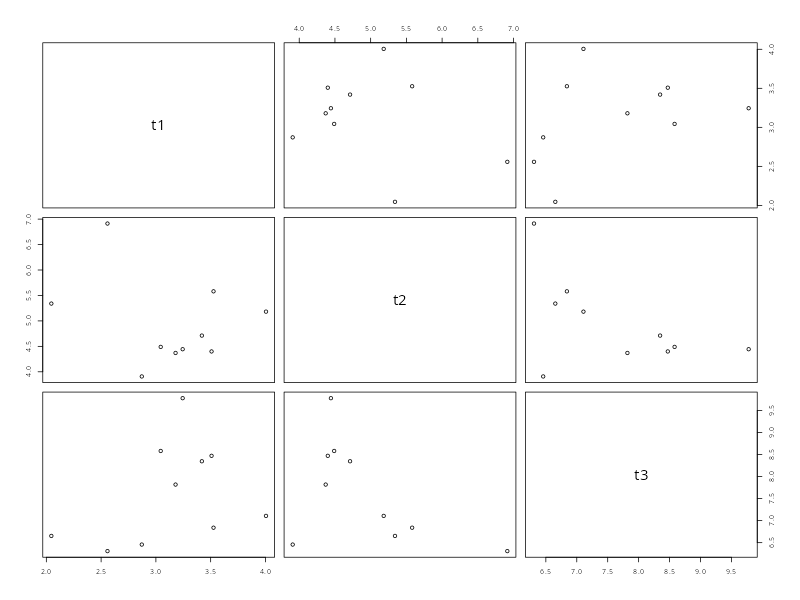

In [2]:
with(selfesteem, pairs(~ t1 + t2 + t3))

Although somewhat subtle, notice that there appears to be a relationship between time-points, particularly those that are close (such as `t2` and `t3`). Let us calculate the correlation

In [3]:
cor(selfesteem[,2:4])

          t1         t2         t3
t1  1.000000 -0.2672690  0.3606020
t2 -0.267269  1.0000000 -0.5230331
t3  0.360602 -0.5230331  1.0000000

So, now we see the core problem here: *repeated measurements are correlated*. 

Although this may not necessarily seem like an issues, this actually creates a *big* problem for our statistical modelling framework. The reasons *why* will not be very clear right now, but we will discuss them in more detail below. Before getting there, it is worth highlighting that correlation is not some unique feature of this single particular dataset. It is a feature of *all* repeated measurements. So much so that we never usually check for it, we just assume that it is there. This is a *feature of reality*. If multiple measurements are taken from the same experimental unit then they will be connected in some fashion. This is true whether the units are *people*, *rats*, *schools*, *classrooms*, *brains*, *cages* or anything else. The point is that the data come from the same source and that source creates a *connection* between the measurements. 

`````{admonition} Repeated Measurements on Human Subjects
:class: tip
In the case of human subjects, we can think of correlation as representing the *internal consistency* of a single individual. If someone is slow at responding during one experimental condition, it is likely they will be slow responding during another experimental condition. There is not pure randomness at play here. There is not an infinite range of responses a subject could give during one experimental condition, irrespective of the responses given during a different experimental condition. The person themselves constrains the reasonable range of responses. As such, their responses during one condition provides a prediction of their responses during a different condition. Their biology and psychology provides a constraint that is captured by the correlation. Importantly, this does not apply to measurements taken from a different subject, who will have their own range of constraints. As such, we conceptualise measurements from *within* a subject as correlated, but measurements from *between* subjects as independent. This is why this has not been a problem before, because every previous example we have seen involved only a *single* measurement of each experimental unit.
``````

## The Problem of Correlation
In order to motivate everything that will follow on this unit, we need to understand the problems that correlation causes. As we will see, dealing with this can be complex and so we need good grounding in what problems we are actually trying to solve and why we cannot just continue in the same fashion we have done previously.

### Correlation and the Linear Model Assumptions
Recall from last semester that our discussions around the linear model assumptions introduced the idea of the errors being $independent$ and $identically$ $distributed$, which we wrote as $i.i.d.$

$$
\begin{alignat*}{1}
    y &= \mu + \epsilon \\
    \epsilon &\stackrel{i.i.d.}{\sim}\mathcal{N}(0,\sigma^{2})
\end{alignat*}
$$

Under repeated measurements, the $independent$ criteria is clearly broken. Correlation is a feature of the probabilistic structure of $y$ and thus will also appear in $\epsilon$. This criteria of independence is important to guarantee that ordinary least squares (and, by extension, maximum likelihood) is the *best linear unbiased estimator*, a condition known as BLUE. "Best" in this context corresponds to an estimator with the *lowest variance*, meaning that we get the *smallest* possible variation from the true value from sample-to-sample. When correlation is present, these estimators lose their status as BLUE, meaning that we will get more variation from sample-to-sample. The estimators still remain *unbiased*, so on average we will still land on the true values. However, there will be a lot more variation along the way. This is known as an estimator being *inefficient*.

### Correlation and the Standard Errors
Although a loss of efficiency is not great, we could probably live with it if that were the only problem being caused. Yes our estimates are less efficient, but they are still unbiased and so we can probably still sleep at night. Indeed, this implies that nothing about the *mean function* really changes under repeated measurements. Means are still means and regression slopes are still regression slopes. So, if all we care about are the estimates related to the mean function, there is little to worry about beyond a drop in efficiency. However, there is a much more dangerous change that occurs when correlation is present. 

Rather than affecting the *mean function*, correlation has a direct impact on the *variance function* of the model. The biggest practical implication of this is that *correlation changes the standard errors*. This means that our *uncertainty* is different under correlation. If we get this wrong, the standard errors will be wrong, the test statistics will be wrong, the confidence intervals will be wrong and the $p$-values will be wrong. In short, neglecting to model the correlational structure will make our *inference wrong*.

#### Theory
The simplest demonstration of how correlation affects uncertainty comes directly from the properties of a random variable. It is a [standard result in probability theory](https://en.wikipedia.org/wiki/Bienaym%C3%A9%27s_identity) that the variance of the *difference* between two random variables ($y_{1}$ and $y_{2}$) is given by 

$$
\text{Var}\left(y_{1} - y_{2}\right) = \text{Var}\left(y_{1}\right) + \text{Var}\left(y_{2}\right) - 2\text{Cov}\left(y_{1},y_{2}\right).
$$


`````{admonition} Covariance and Correlation
:class: tip
The notation $\text{Cov}\left(y_{1},y_{2}\right)$ refers to the *covariance* between $y_{1}$ and $y_{2}$. Covariance can be thought of as correlation, but scaled into units that are comparable to *variance*. The relationship between correlation and covariance is as follows 

$$
\text{Cov}\left(y_{i1},y_{i2}\right) = \sigma_{12} = \sigma_{21} = \rho\sigma_{1}\sigma_{2}, 
$$

where $\rho$ is the correlation, $\sigma_{1}$ is the *standard deviation* of $y_{i1}$ and $\sigma_{2}$ is the *standard deviation* of $y_{i2}$. So *covariance* and *correlation* are really just different units encoding the *same idea*. Correlation simply rescales covariance into the range $[-1, 1]$ to make it more interpretable. Because of this, we will use *correlation* and *covariance* somewhat interchangeably throughout this unit as, for our purpose, they capture the same concept.
`````

To understand formula above, consider the fact that subtracting two random variables produces a *new* random variable. This new random variable will of course *also* have a distribution with a given *width*. This *width* captures our degree of *uncertainty* in relation to how close our estimate is to the true value. What the equation above is saying is that the width of this distribution is a function of the variance of each individual variable *and* their degree of correlation. If the correlation is *positive* the variance will shrink and our uncertainty *decreased*. However, if the correlation is *negative* the variance will *grow* and our uncertainty *increases*. Either way, our uncertainty *depends* upon the degree of correlation.

#### Simulation
To see this change in uncertainty, we can run a simulation in `R`. We will discuss methods of simulating correlated data in the next part of this lesson. For now, we can just examine the results. The plot on the *left* shows the sampling distribution of the mean difference under repeated measurements ($\rho = 0.8$, a *high* correlation). The plot on the *right* shows the sampling distribution of the mean difference under independent measurements ($\rho = 0$, *no* correlation).

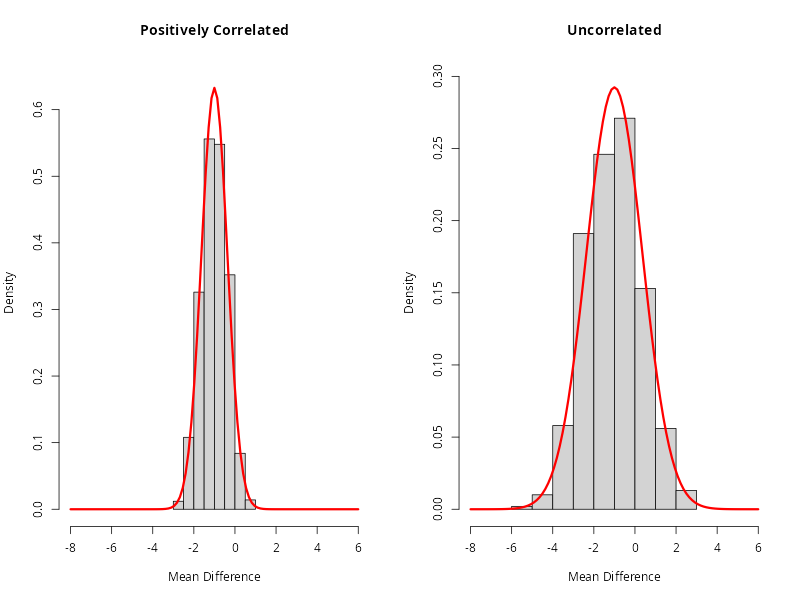

In [20]:
library('MASS')
set.seed(666)

Mu  <- c(1,2)
var <- 1
cov <- 0.8

Sigma.dep <- matrix(c(var,cov,
                      cov,var), nrow=2, ncol=2)

Sigma.ind <- matrix(c(var,   0,
                        0, var), nrow=2, ncol=2)

y.dep <- mvrnorm(n=1000, mu=Mu, Sigma=Sigma.dep) # dependence
y.ind <- mvrnorm(n=1000, mu=Mu, Sigma=Sigma.ind) # independence
diff.dep <- y.dep[,1] - y.dep[,2]
diff.ind <- y.ind[,1] - y.ind[,2]

par(mfrow=c(1,2))

hist(diff.dep, xlim=c(-8,6), ylim=c(0,0.65), xlab='Mean Difference', main='Positively Correlated', probability=TRUE)
curve(dnorm(x, mean=-1, sd=sd(diff.dep)), col="red", lwd=3, add=TRUE)

hist(diff.ind, xlim=c(-8,6), ylim=c(0,0.3), xlab='Mean Difference', main='Uncorrelated', probability=TRUE)
curve(dnorm(x, mean=-1, sd=sd(diff.ind)), col="red", lwd=3, add=TRUE)

Notice that the distribution of differences is much *narrower* when the data are *correlated* compared to the distribution of independent differences. This change is captured precisely in the variance formula above, where the *covariance* between the measurements *subtracts* when the correlation is positive. This is why it is often said that there is a *power advantage* to repeated measurements. Our uncertainty reduces *dramatically* when measurements come from the same experimental units compared to when they come from different units. The problem is that the formulas for the standard errors in a linear model assume that the data are *independent*. As such, the calculation will produce a value that is *too big*. Our data will be consistent with the distribution on the *left*, but the standard errors will be calculated as if it is the distribution on the *right*. We will therefore build conclusions based on assuming that we are *much less certain than we actually are*. This will destroy any power advantage we had when collecting repeated measurements. 

Now, if our only issue were that the estimated standard errors are always *too big* then this is a pain, but it is not disastrous. Our model becomes much less powerful, yes, but our potential for false positives is still controlled. The issue is an increase in *false negatives*, but these are typically seen as less of a problem in practice. It is much more dangerous to conclude that something works when it does not (*false-positive*) compared to concluding that something does not work when it does (*false-negative*). However, we also need to consider the possibility of *negative correlation*. According to the formula above, this will cause the sampling distribution to get *wider*. As such, if we ignore this and use the usual formula for the standard error we will falsely conclude that our estimate is *more certain* than it actually is. Again, we can simulate this in `R`, with the results shown below.

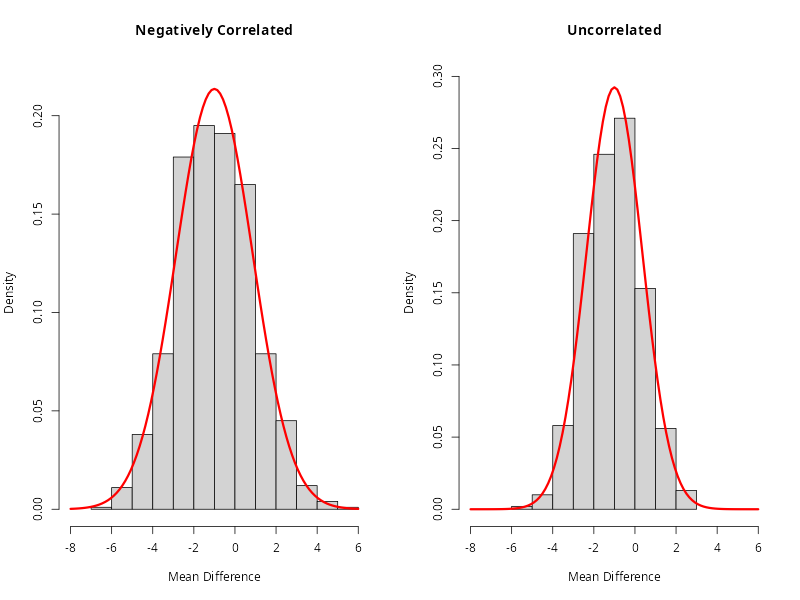

In [29]:
library('MASS')
set.seed(666)

Mu  <- c(1,2)
var <- 1
cov <- -0.8

Sigma.dep <- matrix(c(var,cov,
                      cov,var), nrow=2, ncol=2)

Sigma.ind <- matrix(c(var,   0,
                        0, var), nrow=2, ncol=2)

y.dep <- mvrnorm(n=1000, mu=Mu, Sigma=Sigma.dep) # dependence
y.ind <- mvrnorm(n=1000, mu=Mu, Sigma=Sigma.ind) # independence
diff.dep <- y.dep[,1] - y.dep[,2]
diff.ind <- y.ind[,1] - y.ind[,2]

par(mfrow=c(1,2))

hist(diff.dep, xlim=c(-8,6), ylim=c(0,0.22), xlab='Mean Difference', main='Negatively Correlated', probability=TRUE)
curve(dnorm(x, mean=-1, sd=sd(diff.dep)), col="red", lwd=3, add=TRUE)

hist(diff.ind, xlim=c(-8,6), ylim=c(0,0.3), xlab='Mean Difference', main='Uncorrelated', probability=TRUE)
curve(dnorm(x, mean=-1, sd=sd(diff.ind)), col="red", lwd=3, add=TRUE)

Now, the distribution of differences has become *much wider*. If we assume independence and use the usual formula for the standard error, we will falsely conclude that we are *much more certain than we actually are*. This is precisely the situation where *false-positives* with occur and could lead us to artificially conclude that a new medical treatment *works*, when in fact it *does nothing*.

The important point around all this is that our *uncertainty* depends upon the degree of *correlation*. If we ignore this and just use the usual formulas for the standard error, we will either conclude that we are *less certain* or *more certain* than we actually are. In the context of a linear model, our standard errors will either be *too big* or *too small*. This is a problem not matter what approach to inference we use. However, this is *especially* problematic if we are going on to use NHST for inference, as we will now discuss.

#### Influence on Test Statistics and $p$-values
As you should recall from last semester, the most basic implementation of NHST involves the calculation of a *test statistic* and then subsequent calculation of a $p$-value, based on the theoretical null distribution of that test statistic. The simplest form of test statistic involves simply dividing an *estimate* by its *uncertainty*. The uncertainty is captured by the theoretical standard error of the estimate, which is precisely the *width* of the sampling distributions shown above. As such, our most general conclusion here is that *repeated measurements influence the denominator of the test statistics*. In other words, the *top* of the $t$-statistic is *correct*, but the bottom is *wrong*. 

[^subject-foot]: We will refer generically to *subjects* throughout these materials, as the assumption is that you will generally be working with behavioural data from humans. However, it is worth knowing that statistics has the more general concept of a *unit of analysis*, which could be *humans*, *rats*, *genes*, *schools* or anything else that our inference is based upon.

[^long-foot]: When repeated measurements are taken across longer temporal gaps (e.g. different days, weeks or months), these types of design are often known as *longitudinal* designs. Similarly, if many measurements are taken in close succession over time, these types of data are often viewed as a *time series*. The only real difference is that the measurements have a *specific order* to them and the analysis has to take this order into account. For most repeated measurement designs, the order of the repeats does not matter and is often randomised across subjects.